# Lab Instructions

You have been hired by a record executive to design a guaranteed smash hit song based on data.  The exec has decided that if you make a song that has all the most popular features of recent songs then it will definitely be a hit.  So if - for example - the most common key in the Spotify data is C# then we would want the song we are designing to also be in C#.  If a "typical" value of BPM is between 120 and 130 then we would want the song we are designing to also have a tempo between 120 and 130 BMP.

Visualize and describe the distribution of:
* BPM
* Key
* Mode
* Danceability
* Energy
* Speechiness
* Acousticness

Based on your visualizations and calculations, what values for each of these features would make a song a guaranteed smash hit?  For quantitative features, you should propose a range of values.

Use a large language model to help you write code to identify if there are any songs in the Spotify dataset that meet all of the criteria we determined.  What is/are the artist(s) and title(s) of the song?  Were any of these songs actually popular?

Pick a song that you know was a smash hit. How do the values of BPM, key, mode, danceability, etc. compare to other songs? 

**Hint:**  Import the Spotify data using `df = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')`.

In [9]:
import pandas as pd

df = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')

df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


<Axes: ylabel='Frequency'>

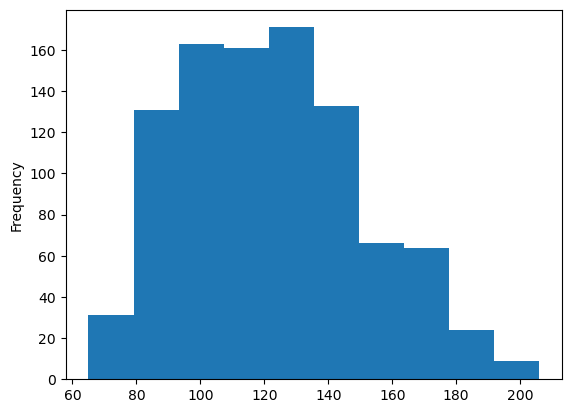

In [15]:
df['bpm'].plot(kind='hist')

# Analysis
## Most Common Features of Songs in Spotify Data
Of the provided data, and following the example given, the most common song features are: a BPM between 100 and 140, the Mode of Major, the Key of C#, an Energy Percentage between 60 and 80, a Danceability Percentage between 60 and 90, a Speechiness Percentage between 0 and 15, and an Accousticness Percentage between 0 and 10. Filtering by all of these features only leaves us with 11 songs from the entire Spotify dataset. Even if we look at the nunmber of streams instead of frequency per feature, we get similar results. One song that comes to mind as a smash hit is Thinking Out Loud by Ed Sheeran which does not fall within the most popular parameters when it comes to features.
## Other observations
I noticed that the streams values in the dataset were not numerical so I converted them using the pandas.to_numeric() method. This allowed me to create buckets for ranges when it came to BPM and the other quantitative metrics.



In [68]:

filtered_df = df [(df['bpm'] >= 100) & (df['bpm'] <= 140) & (df['mode'] == 'Major') & (df['key'] == 'C#') & (df['energy_%'] >= 60) & (df['energy_%'] <= 80) & (df['danceability_%'] >= 55) & (df['danceability_%'] <= 90) & (df['speechiness_%'] >= 0) & (df['speechiness_%'] <= 15) & (df['acousticness_%'] >= 0) & (df['acousticness_%'] <= 10)]

filtered_df.head(25)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,bpm_range
68,Overdrive,Post Malone,1,2023,7,14,410,36,"14,780,425",36,...,C#,Major,56,48,73,0,0,35,4,"(135.5, 159.0]"
106,Cold Heart - PNAU Remix,"Dua Lipa, Elton John, Pnau",3,2017,11,10,21097,52,"1,605,224,506",384,...,C#,Major,80,92,80,4,0,10,3,"(112.0, 135.5]"
107,Dandelions,Ruth B.,1,2017,4,28,3423,21,"1,116,995,633",41,...,C#,Major,61,45,69,2,0,9,3,"(112.0, 135.5]"
162,One Dance,"Drake, WizKid, Kyla",3,2016,4,4,43257,24,"2,713,922,350",433,...,C#,Major,77,36,63,1,0,36,5,"(88.5, 112.0]"
168,We Found Love,"Rihanna, Calvin Harris",2,2011,1,1,36843,21,"1,235,005,533",321,...,C#,Major,73,60,77,3,0,11,4,"(112.0, 135.5]"
236,AMERICA HAS A PROBLEM (feat. Kendrick Lamar),"Kendrick Lamar, Beyoncï¿",2,2023,5,19,896,0,"57,089,066",34,...,C#,Major,78,20,70,1,0,16,4,"(112.0, 135.5]"
600,I WANNA BE YOUR SLAVE,Mï¿½ï¿½ne,1,2021,3,19,4873,0,"851,070,493",65,...,C#,Major,75,96,61,0,0,18,4,"(112.0, 135.5]"
660,Ginseng Strip 2002,Yung Lean,1,2013,8,16,4310,0,"240,769,997",13,...,C#,Major,60,37,71,8,0,48,4,"(112.0, 135.5]"
845,Belly Dancer,"BYOR, Imanbek",2,2022,2,18,5115,13,"383,835,984",109,...,C#,Major,85,42,80,6,0,17,14,"(112.0, 135.5]"
866,Betty (Get Money),Yung Gravy,1,2022,6,10,2402,0,"221,752,937",45,...,C#,Major,73,62,75,0,0,34,8,"(88.5, 112.0]"


<Axes: title={'center': 'Distribution of Musical Keys in Songs'}, xlabel='Musical Key', ylabel='Number of Songs'>

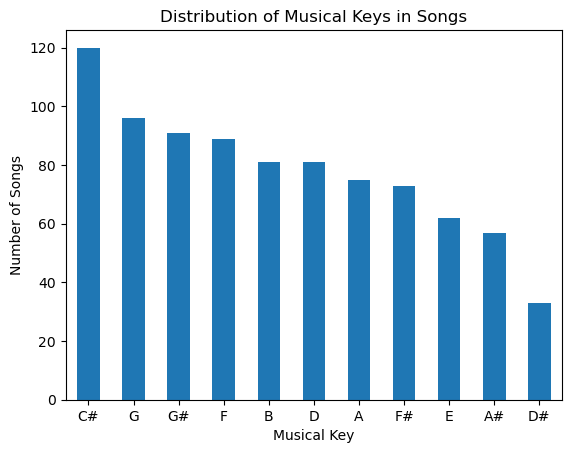

In [48]:
df['key'].value_counts().plot(
    kind='bar',
    title='Distribution of Musical Keys in Songs',
    xlabel='Musical Key',
    ylabel='Number of Songs',
    rot=0
)

<Axes: title={'center': 'Distribution of Musical Modes in Songs'}, xlabel='Musical Mode', ylabel='Number of Songs'>

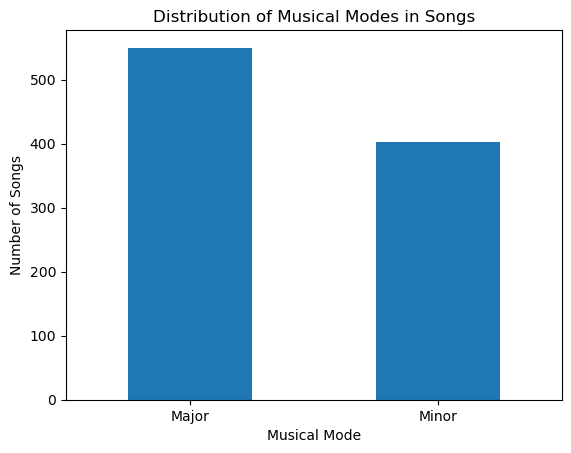

In [50]:
df['mode'].value_counts().plot(
    kind='bar',
    title='Distribution of Musical Modes in Songs',
    xlabel='Musical Mode',
    ylabel='Number of Songs',
    rot=0
)

<Axes: title={'center': 'Distribution of Musical Danceability in Songs'}, xlabel='Danceability %', ylabel='Frequency'>

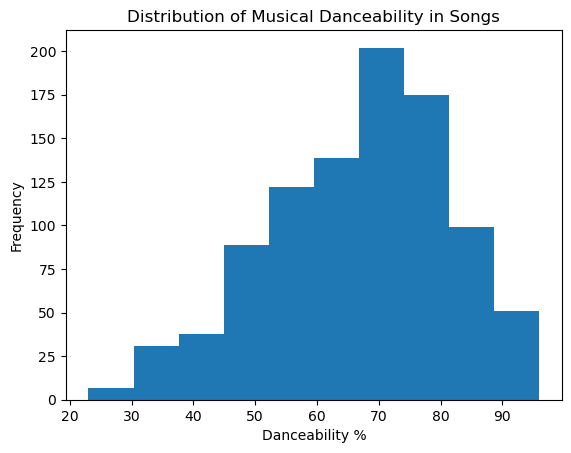

In [53]:
df['danceability_%'].plot(
    kind='hist',
    title='Distribution of Musical Danceability in Songs',
    xlabel='Danceability %'
)

<Axes: title={'center': 'Distribution of Musical Danceability in Songs'}, xlabel='Danceability %', ylabel='Frequency'>

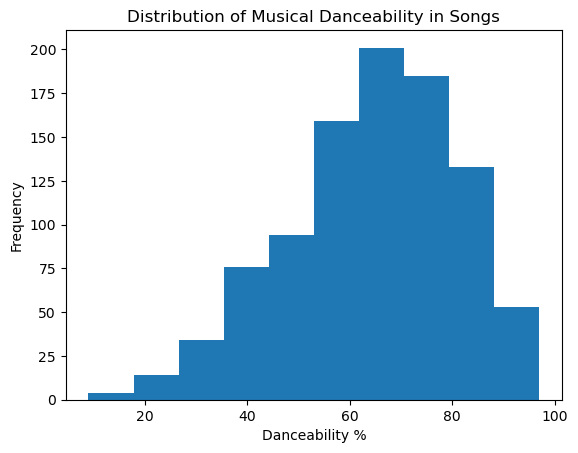

In [ ]:
df['energy_%'].plot(
    kind='hist',
    title='Distribution of Musical Energy in Songs',
    xlabel='Energy %'
)

<Axes: title={'center': 'Distribution of Musical Speechiness in Songs'}, xlabel='Speechiness %', ylabel='Frequency'>

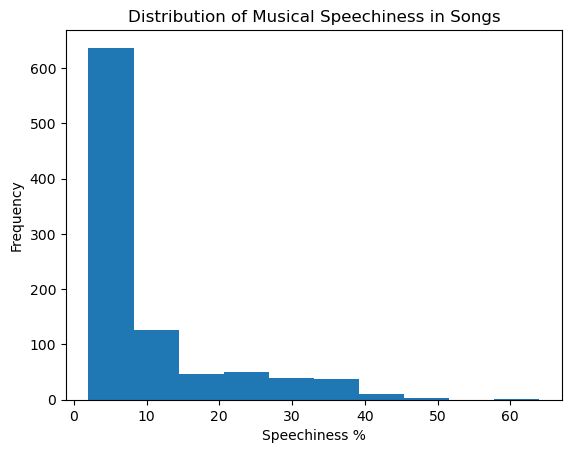

In [56]:
df['speechiness_%'].plot(
    kind='hist',
    title='Distribution of Musical Speechiness in Songs',
    xlabel='Speechiness %'
)

<Axes: title={'center': 'Distribution of Musical Danceability in Songs'}, xlabel='Acousticness %', ylabel='Frequency'>

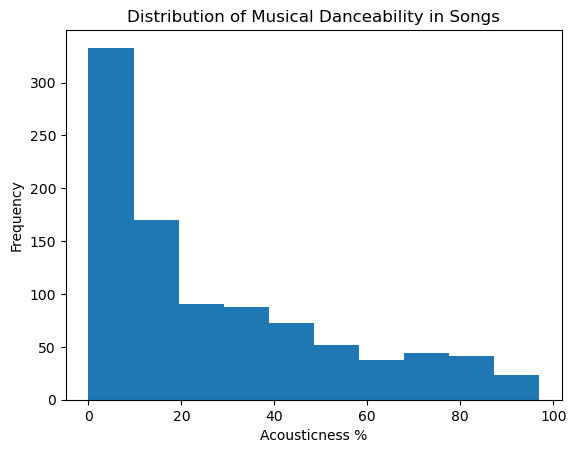

In [55]:
df['acousticness_%'].plot(
    kind='hist',
    title='Distribution of Musical Danceability in Songs',
    xlabel='Acousticness %'
)

In [ ]:
pd.options.display.float_format = '{:,.0f}'.format

# First, convert streams to numeric (in case it's stored as strings)
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

# Then sort by streams (highest to lowest)
most_popular_songs = df.sort_values('streams', ascending=False)
most_popular_songs.head(25)


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,bpm_range,energy_range,danceability_range,speechiness_range,acousticness_range
55,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,"3,703,895,074",672,...,80,0,0,9,7,"(159.0, 182.5]","(67.667, 82.333]","(47.333, 59.5]","(1.938, 12.333]","(-0.097, 16.167]"
179,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,"3,562,543,890",33,...,65,58,0,9,8,"(88.5, 112.0]","(53.0, 67.667]","(71.667, 83.833]","(1.938, 12.333]","(48.5, 64.667]"
86,Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,"2,887,241,814",440,...,41,75,0,11,3,"(88.5, 112.0]","(38.333, 53.0]","(47.333, 59.5]","(1.938, 12.333]","(64.667, 80.833]"
620,Dance Monkey,Tones and I,1,2019,5,10,24529,0,"2,864,791,672",533,...,59,69,0,18,10,"(88.5, 112.0]","(53.0, 67.667]","(71.667, 83.833]","(1.938, 12.333]","(64.667, 80.833]"
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,"2,808,096,550",372,...,50,54,0,7,5,"(88.5, 112.0]","(38.333, 53.0]","(71.667, 83.833]","(1.938, 12.333]","(48.5, 64.667]"
162,One Dance,"Drake, WizKid, Kyla",3,2016,4,4,43257,24,"2,713,922,350",433,...,63,1,0,36,5,"(88.5, 112.0]","(53.0, 67.667]","(71.667, 83.833]","(1.938, 12.333]","(-0.097, 16.167]"
84,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2,2021,7,9,17050,36,"2,665,343,922",492,...,76,4,0,10,5,"(159.0, 182.5]","(67.667, 82.333]","(47.333, 59.5]","(1.938, 12.333]","(-0.097, 16.167]"
140,Believer,Imagine Dragons,1,2017,1,31,18986,23,"2,594,040,133",250,...,78,4,0,23,11,"(112.0, 135.5]","(67.667, 82.333]","(71.667, 83.833]","(1.938, 12.333]","(-0.097, 16.167]"
725,Closer,"The Chainsmokers, Halsey",2,2016,5,31,28032,0,"2,591,224,264",315,...,52,41,0,11,3,"(88.5, 112.0]","(38.333, 53.0]","(71.667, 83.833]","(1.938, 12.333]","(32.333, 48.5]"
48,Starboy,"The Weeknd, Daft Punk",2,2016,9,21,29536,79,"2,565,529,693",281,...,59,16,0,13,28,"(182.5, 206.0]","(53.0, 67.667]","(59.5, 71.667]","(22.667, 33.0]","(-0.097, 16.167]"


<Axes: title={'center': 'Total Streams by Key'}, xlabel='Key', ylabel='Total Streams (Billions)'>

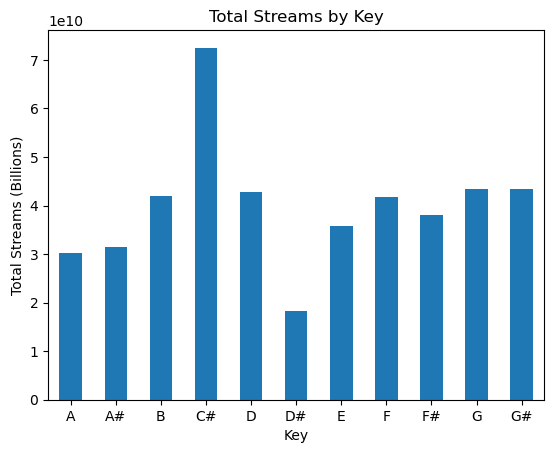

In [60]:
df.groupby('key')['streams'].sum().plot(
    kind='bar',
    title='Total Streams by Key',
    xlabel='Key',
    ylabel='Total Streams (Billions)',
    rot=0
)


<Axes: title={'center': 'Total Streams by Key'}, xlabel='Mode', ylabel='Total Streams (Billions)'>

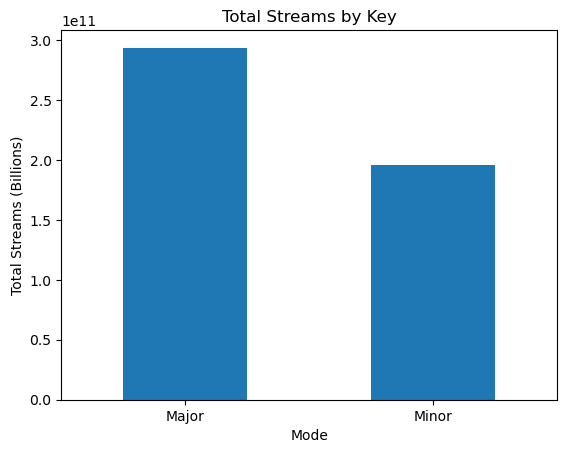

In [61]:
df.groupby('mode')['streams'].sum().plot(
    kind='bar',
    title='Total Streams by Key',
    xlabel='Mode',
    ylabel='Total Streams (Billions)',
    rot=0
)

BPM range: 65 - 206
BPM quartiles:
count   953
mean    123
std      28
min      65
25%     100
50%     121
75%     140
max     206
Name: bpm, dtype: float64


C:\Users\davin\AppData\Local\Temp\ipykernel_604\1114702980.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('bpm_range')['streams'].sum().plot(


<Axes: title={'center': 'Total Streams by BPM Range'}, xlabel='BPM Range', ylabel='Total Streams'>

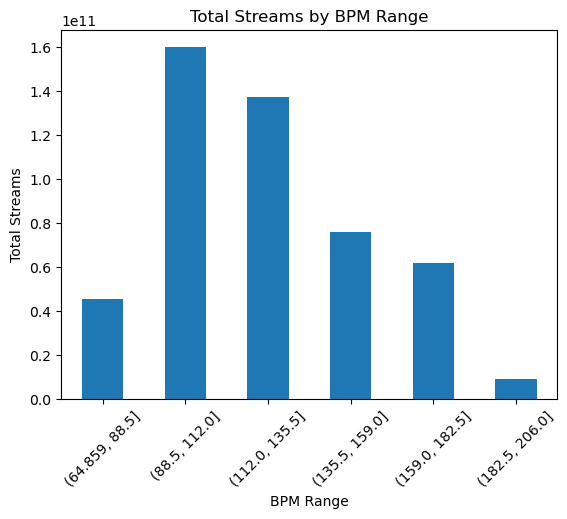

In [65]:
# First, see the BPM distribution in your data
print(f"BPM range: {df['bpm'].min()} - {df['bpm'].max()}")
print(f"BPM quartiles:\n{df['bpm'].describe()}")

# Then create bins based on your actual data
# For example, if your BPM ranges from 60-200:
df['bpm_range'] = pd.cut(df['bpm'], bins=6)  # Creates 6 equal-width bins

df.groupby('bpm_range')['streams'].sum().plot(
    kind='bar',
    title='Total Streams by BPM Range',
    xlabel='BPM Range',
    ylabel='Total Streams',
    rot=45
)

Energy range: 9 - 97
Energy quartiles:
count   953
mean     64
std      17
min       9
25%      53
50%      66
75%      77
max      97
Name: energy_%, dtype: float64


C:\Users\davin\AppData\Local\Temp\ipykernel_604\2804790600.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('energy_range')['streams'].sum().plot(


<Axes: title={'center': 'Total Streams by Energy Range'}, xlabel='Energy Range', ylabel='Total Streams'>

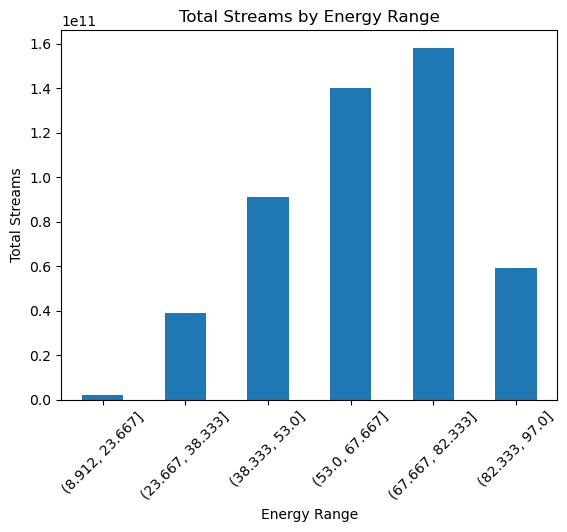

In [73]:
# First, see the BPM distribution in your data
print(f"Energy range: {df['energy_%'].min()} - {df['energy_%'].max()}")
print(f"Energy quartiles:\n{df['energy_%'].describe()}")

# Then create bins based on your actual data
# For example, if your BPM ranges from 60-200:
df['energy_range'] = pd.cut(df['energy_%'], bins=6)  # Creates 6 equal-width bins

df.groupby('energy_range')['streams'].sum().plot(
    kind='bar',
    title='Total Streams by Energy Range',
    xlabel='Energy Range',
    ylabel='Total Streams',
    rot=45
)

Danceability range: 23 - 96
Danceability quartiles:
count   953
mean     67
std      15
min      23
25%      57
50%      69
75%      78
max      96
Name: danceability_%, dtype: float64


C:\Users\davin\AppData\Local\Temp\ipykernel_604\3828572154.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('danceability_range')['streams'].sum().plot(


<Axes: title={'center': 'Total Streams by Danceability Range'}, xlabel='Danceability Range', ylabel='Total Streams'>

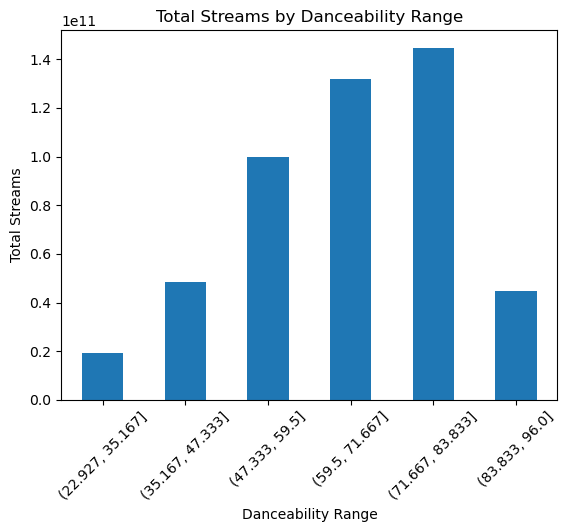

In [74]:
# First, see the BPM distribution in your data
print(f"Danceability range: {df['danceability_%'].min()} - {df['danceability_%'].max()}")
print(f"Danceability quartiles:\n{df['danceability_%'].describe()}")

# Then create bins based on your actual data
# For example, if your BPM ranges from 60-200:
df['danceability_range'] = pd.cut(df['danceability_%'], bins=6)  # Creates 6 equal-width bins

df.groupby('danceability_range')['streams'].sum().plot(
    kind='bar',
    title='Total Streams by Danceability Range',
    xlabel='Danceability Range',
    ylabel='Total Streams',
    rot=45
)

Speechiness range: 2 - 64
Speechiness quartiles:
count   953
mean     10
std      10
min       2
25%       4
50%       6
75%      11
max      64
Name: speechiness_%, dtype: float64


C:\Users\davin\AppData\Local\Temp\ipykernel_604\3043406496.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('speechiness_range')['streams'].sum().plot(


<Axes: title={'center': 'Total Streams by Speechiness Range'}, xlabel='Speechiness Range', ylabel='Total Streams'>

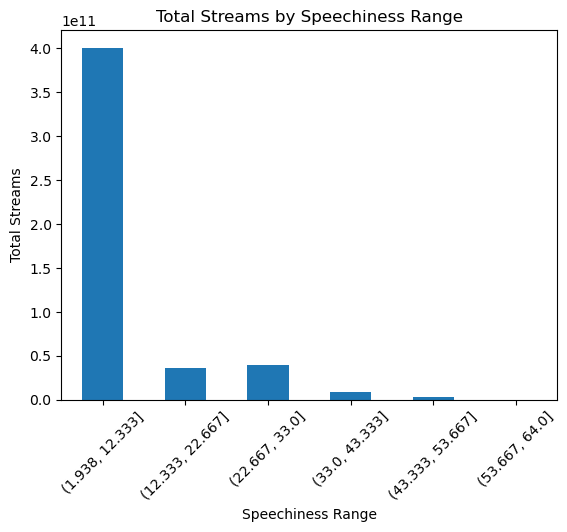

In [76]:
# First, see the BPM distribution in your data
print(f"Speechiness range: {df['speechiness_%'].min()} - {df['speechiness_%'].max()}")
print(f"Speechiness quartiles:\n{df['speechiness_%'].describe()}")

# Then create bins based on your actual data
# For example, if your BPM ranges from 60-200:
df['speechiness_range'] = pd.cut(df['speechiness_%'], bins=6)  # Creates 6 equal-width bins

df.groupby('speechiness_range')['streams'].sum().plot(
    kind='bar',
    title='Total Streams by Speechiness Range',
    xlabel='Speechiness Range',
    ylabel='Total Streams',
    rot=45
)

Acousticness range: 0 - 97
Acousticness quartiles:
count   953
mean     27
std      26
min       0
25%       6
50%      18
75%      43
max      97
Name: acousticness_%, dtype: float64


C:\Users\davin\AppData\Local\Temp\ipykernel_604\876762544.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('acousticness_range')['streams'].sum().plot(


<Axes: title={'center': 'Total Streams by Acousticness Range'}, xlabel='Acousticness Range', ylabel='Total Streams'>

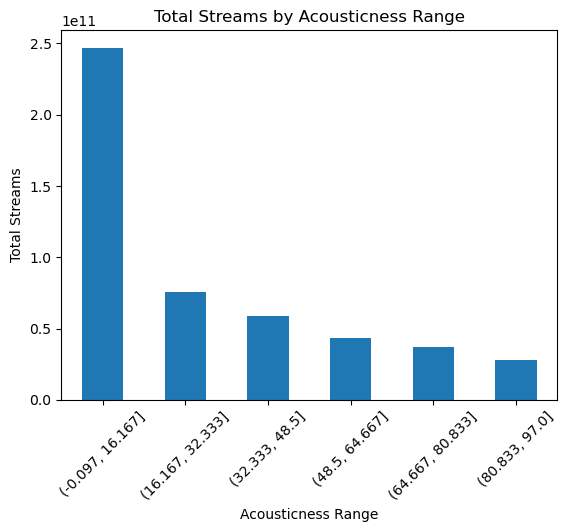

In [77]:
# First, see the BPM distribution in your data
print(f"Acousticness range: {df['acousticness_%'].min()} - {df['acousticness_%'].max()}")
print(f"Acousticness quartiles:\n{df['acousticness_%'].describe()}")

# Then create bins based on your actual data
# For example, if your BPM ranges from 60-200:
df['acousticness_range'] = pd.cut(df['acousticness_%'], bins=6)  # Creates 6 equal-width bins

df.groupby('acousticness_range')['streams'].sum().plot(
    kind='bar',
    title='Total Streams by Acousticness Range',
    xlabel='Acousticness Range',
    ylabel='Total Streams',
    rot=45
)

## With New Feature Ranges

In [78]:
new_filtered_df = df [(df['bpm'] >= 90) & (df['bpm'] <= 135) & (df['mode'] == 'Major') & (df['key'] == 'C#') & (df['energy_%'] >= 50) & (df['energy_%'] <= 85) & (df['danceability_%'] >= 55) & (df['danceability_%'] <= 90) & (df['speechiness_%'] >= 0) & (df['speechiness_%'] <= 12) & (df['acousticness_%'] >= 0) & (df['acousticness_%'] <= 17)]

new_filtered_df.head(25)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,bpm_range,energy_range,danceability_range,speechiness_range,acousticness_range
1,LALA,Myke Towers,1,2023,3,23,1474,48,"133,716,286",48,...,74,7,0,10,4,"(88.5, 112.0]","(67.667, 82.333]","(59.5, 71.667]","(1.938, 12.333]","(-0.097, 16.167]"
106,Cold Heart - PNAU Remix,"Dua Lipa, Elton John, Pnau",3,2017,11,10,21097,52,"1,605,224,506",384,...,80,4,0,10,3,"(112.0, 135.5]","(67.667, 82.333]","(71.667, 83.833]","(1.938, 12.333]","(-0.097, 16.167]"
107,Dandelions,Ruth B.,1,2017,4,28,3423,21,"1,116,995,633",41,...,69,2,0,9,3,"(112.0, 135.5]","(67.667, 82.333]","(59.5, 71.667]","(1.938, 12.333]","(-0.097, 16.167]"
162,One Dance,"Drake, WizKid, Kyla",3,2016,4,4,43257,24,"2,713,922,350",433,...,63,1,0,36,5,"(88.5, 112.0]","(53.0, 67.667]","(71.667, 83.833]","(1.938, 12.333]","(-0.097, 16.167]"
168,We Found Love,"Rihanna, Calvin Harris",2,2011,1,1,36843,21,"1,235,005,533",321,...,77,3,0,11,4,"(112.0, 135.5]","(67.667, 82.333]","(71.667, 83.833]","(1.938, 12.333]","(-0.097, 16.167]"
236,AMERICA HAS A PROBLEM (feat. Kendrick Lamar),"Kendrick Lamar, Beyoncï¿",2,2023,5,19,896,0,"57,089,066",34,...,70,1,0,16,4,"(112.0, 135.5]","(67.667, 82.333]","(71.667, 83.833]","(1.938, 12.333]","(-0.097, 16.167]"
525,One Right Now (with The Weeknd),"The Weeknd, Post Malone",2,2021,11,5,4771,0,"539,595,276",68,...,78,4,0,7,5,"(88.5, 112.0]","(67.667, 82.333]","(59.5, 71.667]","(1.938, 12.333]","(-0.097, 16.167]"
600,I WANNA BE YOUR SLAVE,Mï¿½ï¿½ne,1,2021,3,19,4873,0,"851,070,493",65,...,61,0,0,18,4,"(112.0, 135.5]","(53.0, 67.667]","(71.667, 83.833]","(1.938, 12.333]","(-0.097, 16.167]"
660,Ginseng Strip 2002,Yung Lean,1,2013,8,16,4310,0,"240,769,997",13,...,71,8,0,48,4,"(112.0, 135.5]","(67.667, 82.333]","(59.5, 71.667]","(1.938, 12.333]","(-0.097, 16.167]"
778,Dos Mil 16,Bad Bunny,1,2022,5,6,892,3,"338,422,004",10,...,67,12,0,13,5,"(112.0, 135.5]","(53.0, 67.667]","(71.667, 83.833]","(1.938, 12.333]","(-0.097, 16.167]"
